<a href="https://colab.research.google.com/github/vardhamansankarc/DataTrained_Fliprobo_practice_projects/blob/main/Second_phase_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

                                                                 Titanic Survival Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#not to get it

In [6]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
df = pd.read_csv(url)

In [9]:
print(df.head())
print(df)
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [10]:
def preprocess_data(data):
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return data

df = preprocess_data(df)

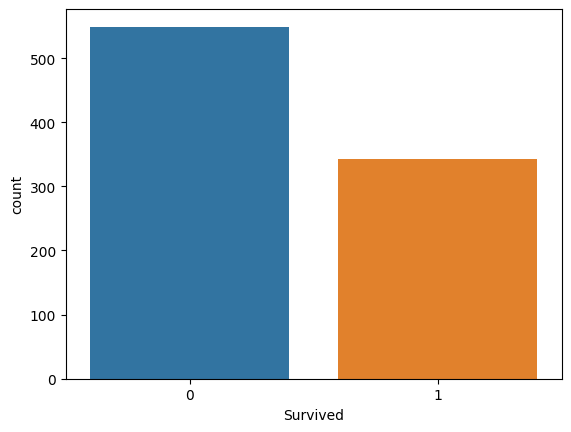

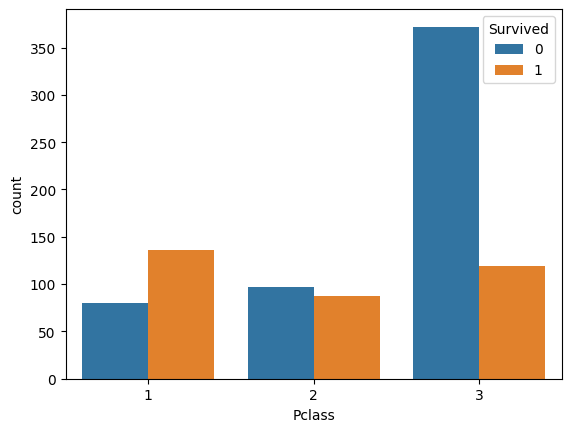

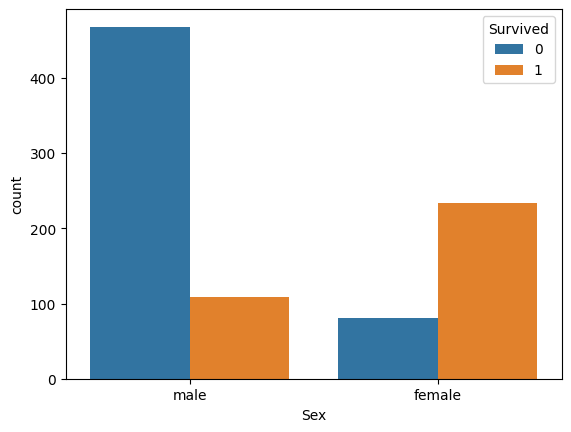

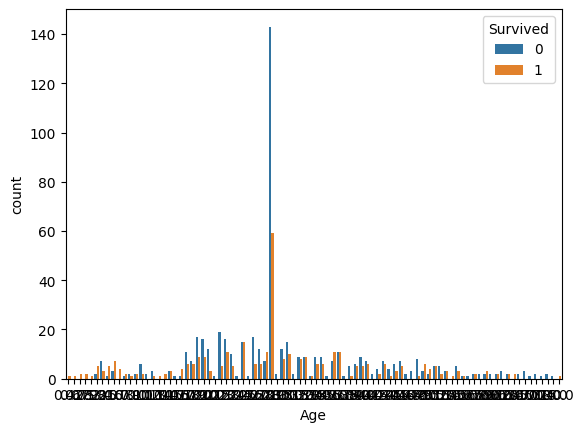

In [13]:
sns.countplot(x='Survived', data=df)
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()
sns.countplot(x='Age', hue='Survived', data=df)
plt.show()

In [14]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])




model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.4f}')

Accuracy of the model: 0.8212


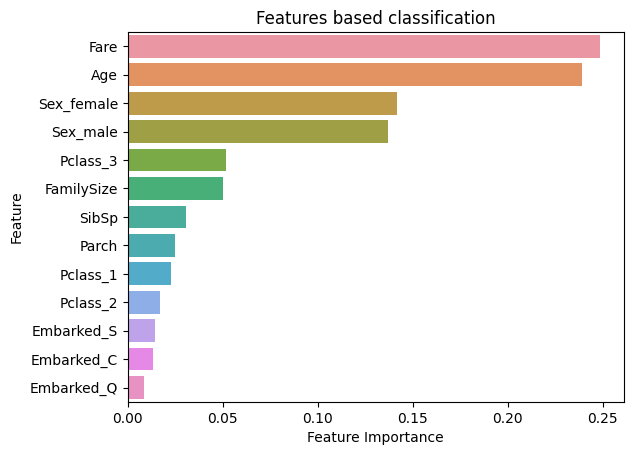

In [19]:
if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    feature_importances = model.named_steps['classifier'].feature_importances_
    one_hot_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
    features = numerical_features + list(one_hot_feature_names)
    feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Features based classification')
    plt.show()

                                                                 World Happiness Report Project